In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import warnings, shap
warnings.filterwarnings ("ignore")
shap.initjs()

In [2]:
#读取数据
data = pd.read_csv(r'./features_GIPF_test_240206.csv')
x = data.iloc[:,2:]
y = data[['Tm']]
x

,Dipole,Volume,Density,MIVA,MAVA,OSA,PtSA,NgSA,OAV,PAV,...,PlSA,Crystal density,MaxAES,MaxESI,MinAES,MinESI,qed,MolWt,HAMW,EMW
0,3.5953,204.46391,1.4388,-34.85049,29.45295,202.60118,126.37181,76.22937,3.64943,14.73916,...,154.77,1.432011,11.041334,11.041334,0.852130,-3.103009,0.480237,177.163,170.107,177.053827
1,5.0054,241.82465,1.3885,-33.42281,23.81998,233.84508,147.66674,86.17834,0.81285,10.48046,...,137.31,1.396321,11.400733,11.400733,0.421141,-3.056845,0.554869,202.213,192.133,202.074228
2,7.6190,270.71128,1.4674,-35.42778,31.72125,257.57659,162.26520,95.31139,0.96308,11.85108,...,148.23,1.505691,11.349951,11.349951,0.356852,-2.843372,0.371596,239.234,230.162,239.069477
3,4.1320,356.63792,1.2589,-31.88375,16.58033,303.59045,241.43976,62.15069,2.16899,6.82142,...,73.03,1.222941,12.771605,12.771605,1.525340,-5.419838,0.582006,270.373,244.165,270.194343
4,5.0033,308.33922,1.4071,-31.32148,20.66099,291.29166,220.68217,70.60949,2.58931,8.37858,...,125.54,1.379717,12.821383,12.821383,1.262270,-4.081578,0.476247,261.277,246.157,261.100108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.7789,316.28387,1.4033,-35.86466,22.07990,294.49231,176.83906,117.65325,0.55570,9.12656,...,135.01,1.388422,11.859729,11.859729,0.717646,-3.278923,0.614780,267.284,254.180,267.089543
796,5.3380,231.60299,1.3781,-38.61127,43.70212,220.87359,141.94799,78.92560,1.67981,10.47197,...,92.66,1.417549,11.271016,11.271016,0.413434,-3.545891,0.420313,192.218,180.122,192.089878
797,2.7721,401.77874,1.3571,-42.60496,39.37239,376.22117,236.70059,139.52057,1.37269,9.19197,...,152.93,1.388591,13.037832,13.037832,0.926235,-4.148404,0.454899,328.368,308.208,328.142307
798,6.8792,356.74946,1.6071,-21.87539,25.63418,323.02622,189.80930,133.21693,1.90545,10.29442,...,169.41,1.571148,11.679737,11.679737,0.734644,-4.664877,0.401165,345.267,334.179,345.059700


In [3]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=42)
# ss = StandardScaler()
# x_train = ss.fit_transform(x_train)
# x_test = ss.transform(x_test)

In [14]:
clf  =  RandomForestRegressor()

clf.fit(x_train,y_train)
clf.score(x_test,y_test)

-0.04601761426059148

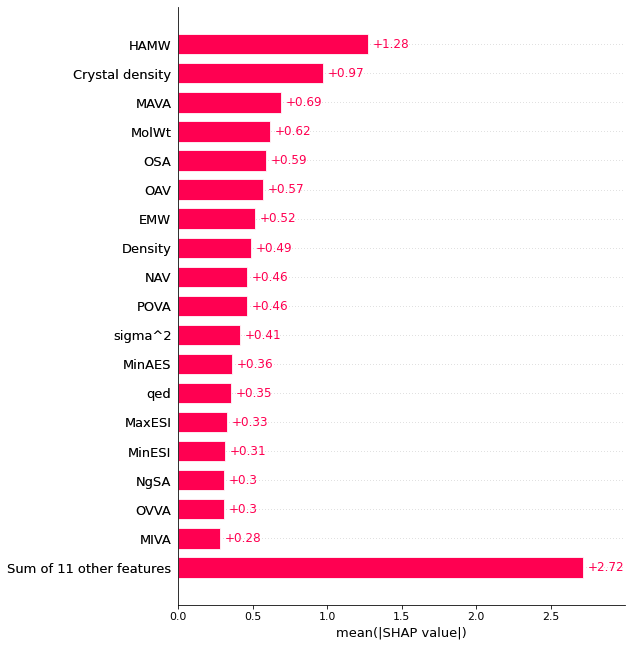

In [16]:
explainer = shap.TreeExplainer(clf)
shap_values2 = explainer(x) 
shap.plots.bar(shap_values2,max_display=19)

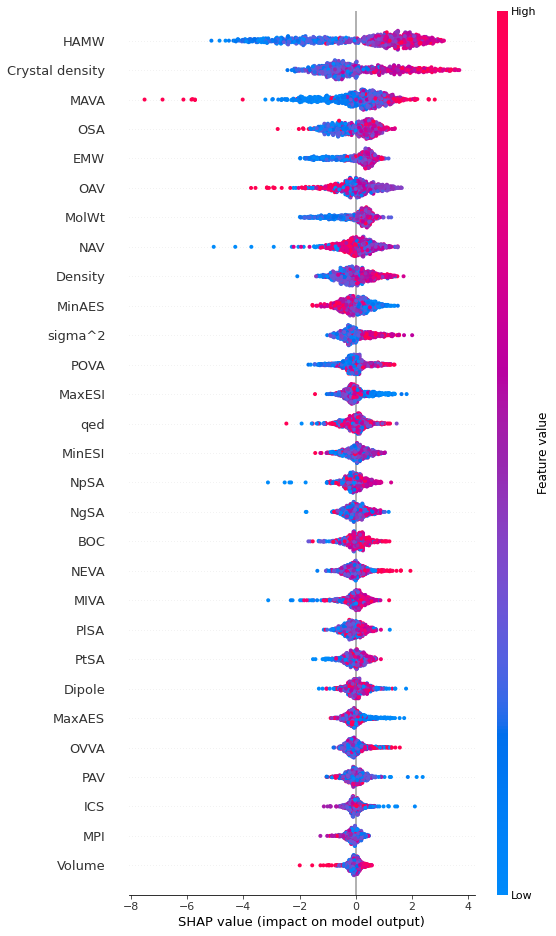

In [31]:
# SHAP计算
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(x)

# 特征统计值
shap.summary_plot(shap_values, x, max_display=30)
# 图3

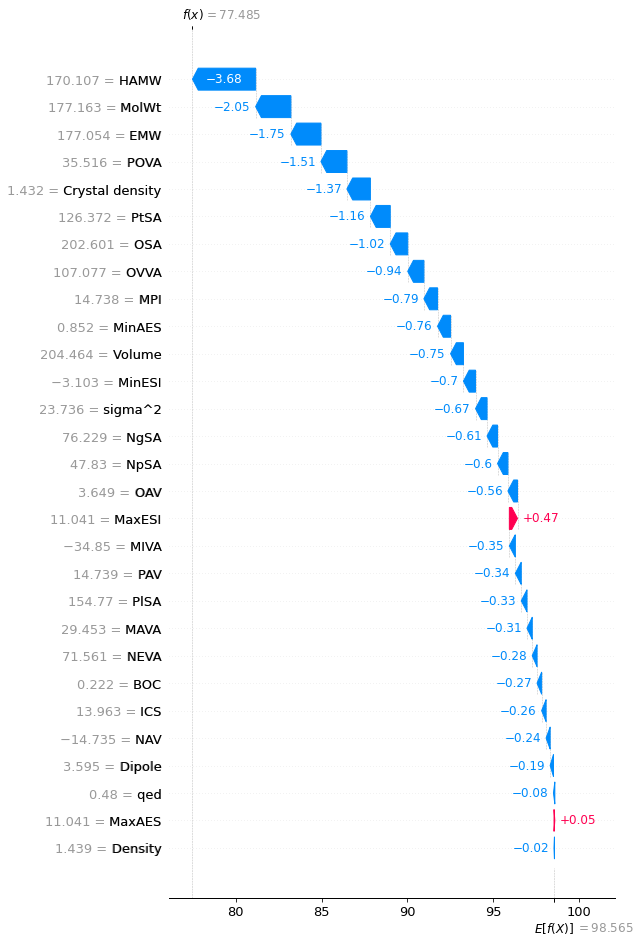

In [5]:
explainer = shap.TreeExplainer(clf)
shap_values2 = explainer(x)
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values2[0],max_display=30)

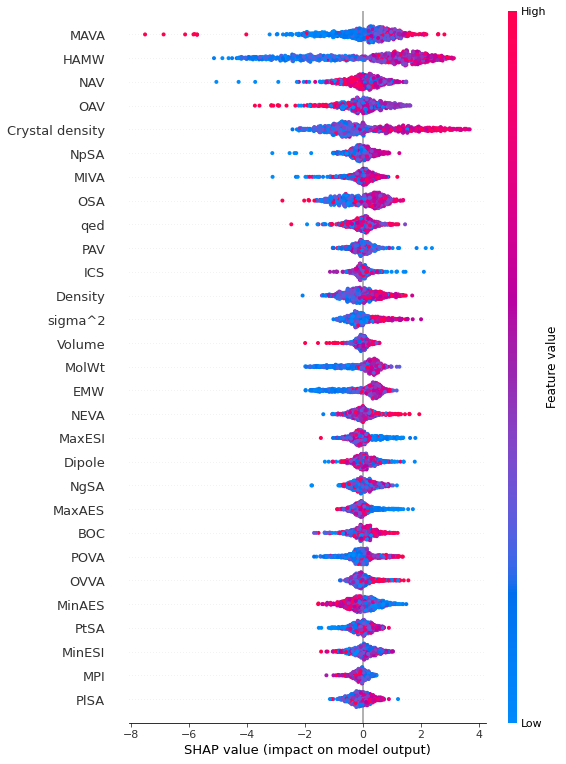

In [34]:
shap_values = shap_values = explainer.shap_values(x)
shap.plots.beeswarm(shap_values2, 
                    order=shap_values2.abs.max(0),max_display=30)

In [ ]:
shap_interaction_values = explainer.shap_interaction_values(x)
shap.summary_plot(shap_interaction_values,x)